# [DUN](http://www.if.pw.edu.pl/~zebra/tbjjz.php?dir=DUN)

# Wykład 1 (DUN1)

Jedno kolokwium a la egzamin połówkowy, czwórka z niego oznacza zwolnienie z połowy egzaminu końcowego, żeby rozbić materiał na coś sensownego

Uważać na opracowania internetowe, często mają błędy! Dopytywać w razie nieścisłości i wątpliwości!

**Dygresje są ważne!**

Płaszczyzna fazowa: wykres $p(x)$ zamiast $x(t)$

Całe to wszystko ma nazwę profesjonalną Complex Systems oraz dziennikarską, "Teoria chaosu".

Chaos deterministyczny: trajektrorie NIE POWTARZAJĄ SIĘ mimo deterministycznego równania, które je opisuje. Silna zależność od warunków początkowych.

Horyzont przewidywalności - czas po jakim nie możemy już przewidzieć zachowania układu (to chyba nie jest jedna, sztywna granica)...

Do układów nieliniowych stosuje się metody explicit liczenia numerycznego (polecam wikipedię), prawdopodobnie dlatego że implicit z odwracaniem macierzy $A^-1$ się sypią przez $det A = 0$ ?

Przykłady niestabilności:
* Solitony optyczne
* Cała metorologia, przewidywanie klimatu
* W telekomunikacji (szyfrowanie danych przez deterministyczną ewolucję czasową?)
* Chemia (reakcje Biełusowa-Tego drugiego czy jak im tam było)
* Rezonans stochastyczny (szum zawiera fourierowskie składowe które wzmacniają drgania?)
* Medyczna:
    * Elektrofizjologia (badania na PW, serce, mięśnie, naczynia krwionośne)
    * Hemodynamika (fraktalne naczynia krwionośne)
    * Neurologia
* Dynamika symboliczna (T. Buchner)
* Intermittency
* Analiza fraktalna

Monika Petelczyc vs J.J. Żebrowski - dwa różne podejścia, stochastyczne vs deterministyczne




### Jak to zwykle wygląda

Mamy szum. Czy ten szum jest losowy? Czy istnieje *odzworowanie* $x_{n+1} = f(x_n)$?

Przykład: *mapa logistyczna*:
$x_{n+1} = r x_n (1-x_n)$

Tzw. wykres bifurkacyjny


[Samoorganizująca się krytyczność (Self organized criticality)](https://en.wikipedia.org/wiki/Self-organized_criticality)

# Wykład 2 (DUN2)

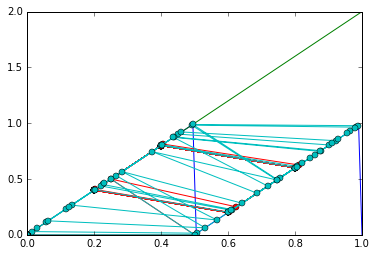

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Bernoulli(x, a):
    return (a*x)%1

x = np.linspace(0,1,100)
y = x
a = 2
for i in range(1):
    y = Bernoulli(y, a)

plt.plot(x, y)
plt.plot(x, a*x)


x = 0.2
y = 0.2001
xl = []
yl = []
tl = []
dl = []
for i in range(5000):
    xl.append(x)
    yl.append(y)
    tl.append(i)
    dl.append(abs(y-x))
    x = Bernoulli(x, a)
    y = Bernoulli(y, a)
    

plt.plot(xl[:-1], xl[1:], 'ro-')
plt.plot(yl[:-1], yl[1:], 'co-')

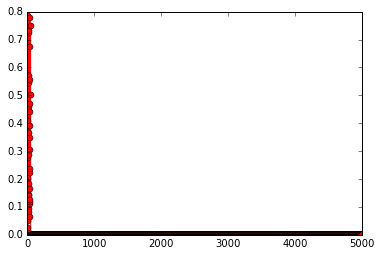

In [2]:
plt.plot(tl, dl, 'ro-')

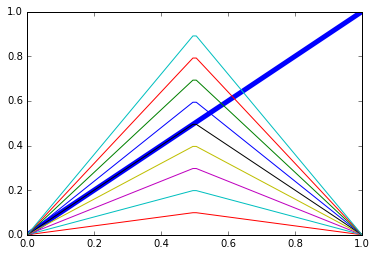

In [3]:
def tent(x, a):
    return a*(1-2*np.abs(0.5-x))

x = np.linspace(0,1,100)
plt.plot(x, x, lw=5)
for a in np.linspace(0,1,10, endpoint=False):
# for a in (0.9999999999999999999,):  
    y = x
    for i in range(1):
        y = tent(y, a)

    plt.plot(x, y)

## Gęstość niezmiennicza
[Wikipedia](https://en.wikipedia.org/wiki/Invariant_measure) ma art o miarze niezmienniczej i to jest coś nieco innego.

Gęstość niezmiennicza jest fajnie opisana na [Mathworld](http://mathworld.wolfram.com/NaturalInvariant.html). Intuicyjny koncept jak się zastanowić. **Ułamek czasu, jaki układ w swojej końcowej orbicie spędza w częsci $x + dx$ swojej dostępnej trajektorii, nazywamy gęstością niezmienniczą $\rho(x)$.**

# Wykład 3 (DUN3)